# Задание 6. Проверка статистических гипотез.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os

# Устанавливаем значение рабочей дирректории.
os.chdir("C:/Users/Michael/Documents/DataSet/Task_6")

## Успеваемость студентов на экзаменах. Критерий Флингера-Килина. <br> Гипотеза о равенстве средних значений

In [3]:
# Чтение данных из таблицы.
Students = pd.read_csv("Students_Performance_in_Exams\StudentsPerformance.csv", delimiter=',', encoding='cp1251')

In [4]:
# Выводим на экран первые 5 элементов таблицы.
Students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
Students = Students.replace('completed', 1)
Students = Students.replace('none', 0)
Students["general score"] = Students["math score"] + Students["reading score"] + Students["writing score"]

In [6]:
# Сохраним в отдельные переменные выборки, которые собираемся сравнивать.
x = Students[Students["test preparation course"] == 1]["general score"]
y = Students[Students["test preparation course"] == 0]["general score"]
x.name, y.name = 'test preparation course', 'nothing'

In [7]:
def two_histograms(x, y):

    plt.figure(figsize=(8, 8))
    binwidth = 15
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), bins=range(min(x), max(x) + binwidth, binwidth))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), bins=range(min(y), max(y) + binwidth, binwidth))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

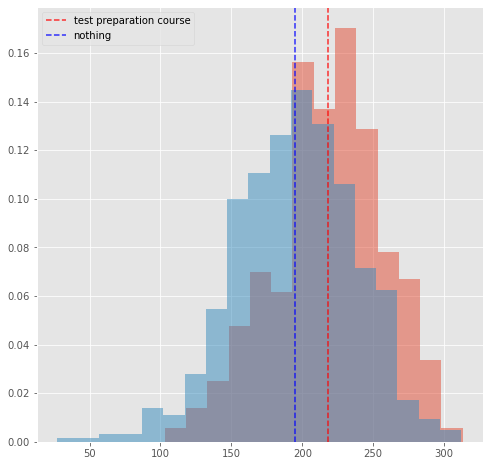

In [8]:
# Пунктирными линиями указываются средние значения выборок.
two_histograms(x, y)

In [9]:
# Проверим гипотезу о равенстве дисперсий векторов, которые мы определили выше.
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.10805015969464081


In [10]:
# Проверим гипотезу о равенстве средних значений для несвязных выборок.
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  1.6337802035921865e-16


## Продажа домов в округе Кинг. Корреляция цены и года постройки домов

In [11]:
# Чтение данных из таблицы.
House = pd.read_csv("House_Sales_in_King_County\kc_house_data.csv", delimiter=',', encoding='cp1251')

In [12]:
# Выводим на экран первые 5 элементов таблицы.
House.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


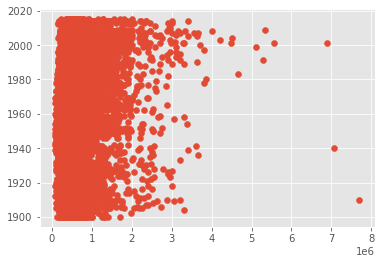

In [13]:
# Построим график разброса точек
plt.scatter(House['price'], House['yr_built']);

In [14]:
# Убедимся, что колличество примеров достаточно, для проверки следующей гипотезы
House.shape

(21613, 21)

In [15]:
# Вычисляет коэффициент корреляции Пирсона и значение p для проверки корреляции.
res = stats.pearsonr(House['price'], House['yr_built'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.05401153149479271
p-value:  1.929872809396617e-15


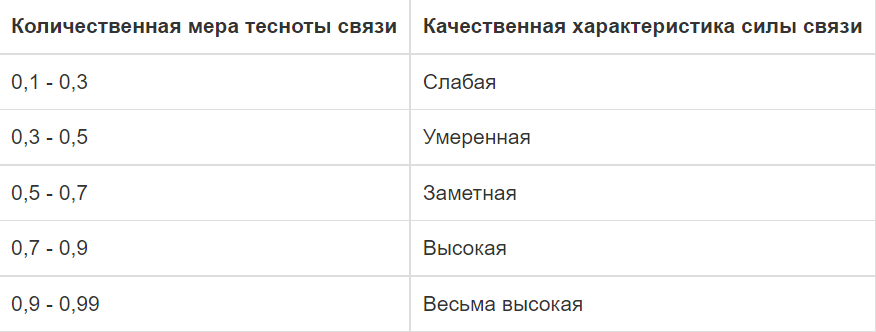

In [16]:
# Шкала Чеддока для определения силы кореляции по Пирсону
from IPython.display import Image
Image('Chaddock_scale.png')

## Эффективность работы сотрудников. Критерий Шапиро-Уилка. <br> Критерий Манна-Уитни

In [17]:
# Чтение данных из таблицы.
HR = pd.read_csv(r"IBM_HR_Analytics_Employee_Attrition_&_Performance\WA_Fn-UseC_-HR-Employee-Attrition.csv", delimiter=',')

In [18]:
# Выводим на экран первые 5 элементов таблицы.
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


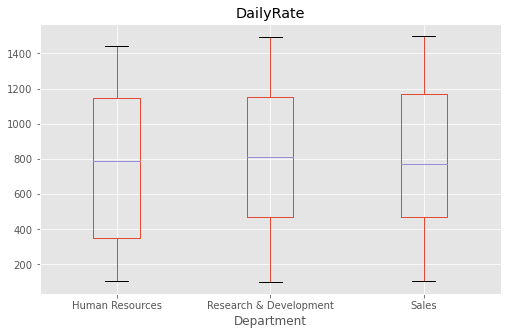

In [19]:
hr = HR.boxplot(column='DailyRate', by='Department', figsize=(8,5))
hr.get_figure().suptitle('');

In [20]:
# Сохраним в отдельные переменные выборки, которые собираемся сравнивать.
x = HR[HR["Department"] == "Sales"]["DailyRate"]
y = HR[HR["Department"] == "Research & Development"]["DailyRate"]
z = HR[HR["Department"] == "Human Resources"]["DailyRate"]

In [21]:
# Проверим гипотезу о нормальности распределения
stats.shapiro(x)

ShapiroResult(statistic=0.9542436003684998, pvalue=1.567890678400019e-10)

In [22]:
# Проверим гипотезу о нормальности распределения
stats.shapiro(y)

ShapiroResult(statistic=0.9552520513534546, pvalue=1.5616696155946292e-16)

In [23]:
# Проверим гипотезу о нормальности распределения
stats.shapiro(z)

ShapiroResult(statistic=0.9240860342979431, pvalue=0.000820618646685034)

In [24]:
# Проверка гипотезы о равенстве медиан
res = stats.mannwhitneyu(x, y)
print('p-value: ', res[1])

p-value:  0.39840002793099677


In [25]:
# Проверка гипотезы о равенстве медиан
res = stats.mannwhitneyu(x, z)
print('p-value: ', res[1])

p-value:  0.18223915558173576


In [26]:
# Проверка гипотезы о равенстве медиан
res = stats.mannwhitneyu(z, y)
print('p-value: ', res[1])

p-value:  0.14243326757258445
